In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.6 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn pandas matplotlib seaborn


Scraping using Reddit subreddits(scraper.py)


In [3]:
import praw
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Reddit API
reddit = praw.Reddit(
    client_id="lrgG7I_U2eSkmekDbXbT6g",  # Reddit Client ID
    client_secret="qNYYKV1btLw_5qqef0CCKP-6nd-3lg",  # Reddit Client Secret
    user_agent="Monesh Jangam Stock Sentiment Analyzer"
)

indian_stocks = [
    "TCS", "Reliance", "Infosys", "HDFC Bank", "ICICI Bank", "HUL", "SBI", "Bharti Airtel",
    "Asian Paints", "Wipro", "L&T", "Bajaj Finance", "Kotak Mahindra Bank", "Axis Bank", "Maruti Suzuki",
    "Sun Pharma", "NTPC", "Adani Green", "Tech Mahindra", "M&M", "Hindustan Zinc", "ITC", "Power Grid",
    "Dr. Reddy's", "Bajaj Auto", "HDFC Life", "UltraTech Cement", "Cipla", "Nestle India", "Hero MotoCorp",
    "Grasim", "Titan Company", "ICICI Lombard", "Bharti Infratel", "BPCL", "ONGC", "GAIL", "Zee Entertainment",
    "Tata Motors", "SBI Life Insurance", "IndusInd Bank", "Ambuja Cements", "Divi's Laboratories",
    "HDFC Asset Management", "Motherson Sumi", "Vodafone Idea", "Glenmark", "Godrej Consumer Products",
    "Tata Steel", "Wipro", "Dr. Lal Pathlabs", "Britannia", "Lupin", "Godrej Properties", "Jindal Steel",
    "Indiabulls Housing Finance", "Shree Cement", "Marico", "Bank of Baroda", "JPMorgan Chase", "Mindtree",
    "Adani Ports", "Bharat Forge", "Colgate Palmolive", "Larsen & Toubro", "JSW Steel", "SBI Cards",
    "Indian Oil Corporation", "M&M Finance", "Tata Chemicals", "Avenue Supermarts", "Sundaram Fasteners",
    "GAIL India", "HCL Technologies", "Bajaj Finserv", "L&T Finance", "Kajal Shukla", "Indian Bank",
    "Shaanxi Coal and Chemical", "Giva", "Tata Consumer", "ABB", "Motilal Oswal", "Havells India",
    "Kalyan Jewellers", "Kotak Securities", "Heritage Foods", "Eicher Motors", "Nifty 50", "Sail",
    "VST Tillers", "Torrent Pharmaceuticals", "Emami", "Exide Industries", "Shilpa Medicare", "Bata India",
    "PVR", "Amara Raja Batteries", "ICRA", "Manappuram Finance", "Borosil Renewables", "Hawkins Cookers",
    "Vaibhav Global", "Blue Star", "Dabur India", "Alkem Laboratories", "Minda Industries", "United Spirits",
    "Century Plyboards", "Patanjali Ayurved", "Sasken Technologies", "Jubilant Foodworks", "FMCG Stocks",
    "Zydus Cadila", "Edelweiss", "DBS Bank", "Kesoram Industries", "Aurobindo Pharma", "Muthoot Finance",
    "Syngene", "Thermax", "Shree Rajlaxmi", "NLC India", "Power Finance Corporation", "Ashok Leyland",
    "Adani Transmission", "Sharda Motor", "KEC International"
]
# subreddit to search
subreddit_name = "IndianStockMarket"

# posts for each stock
all_data = []
for stock in indian_stocks:
    print(f"Fetching posts for {stock}...")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(stock, limit=2000)

    for post in posts:
        all_data.append({
            "Stock": stock,
            "Title": post.title,
            "Score": post.score,
            "Comments": post.num_comments,
            "URL": post.url,
            "Created": pd.to_datetime(post.created_utc, unit='s')
        })

df = pd.DataFrame(all_data)

# Filter posts for the year 2024
df = df[df['Created'].dt.year == 2024]

# Extract month and year from the 'Created' column
df['YearMonth'] = df['Created'].dt.to_period('M')

# Sentiment analysis function
def get_sentiment_score(text):
    polarity = TextBlob(text).sentiment.polarity
    return polarity

# Apply sentiment analysis
df['Sentiment_Score'] = df['Title'].apply(get_sentiment_score)

# Aggregate sentiment scores month-wise for each stock
monthly_sentiment = df.groupby(['Stock', 'YearMonth'])['Sentiment_Score'].mean().reset_index()
monthly_sentiment.rename(columns={'Sentiment_Score': 'Monthly_Sentiment_Score'}, inplace=True)
# Print monthly sentiment scores
print(monthly_sentiment)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for TCS...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Reliance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Infosys...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for HDFC Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ICICI Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for HUL...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for SBI...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bharti Airtel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Asian Paints...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Wipro...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L&T...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bajaj Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Kotak Mahindra Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Axis Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Maruti Suzuki...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sun Pharma...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for NTPC...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Adani Green...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Tech Mahindra...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for M&M...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Hindustan Zinc...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ITC...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Power Grid...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dr. Reddy's...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bajaj Auto...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for HDFC Life...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for UltraTech Cement...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Cipla...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Nestle India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Hero MotoCorp...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Grasim...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Titan Company...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ICICI Lombard...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bharti Infratel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for BPCL...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ONGC...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for GAIL...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Zee Entertainment...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Tata Motors...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for SBI Life Insurance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for IndusInd Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ambuja Cements...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Divi's Laboratories...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for HDFC Asset Management...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Motherson Sumi...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Vodafone Idea...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Glenmark...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Godrej Consumer Products...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Tata Steel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Wipro...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dr. Lal Pathlabs...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Britannia...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Lupin...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Godrej Properties...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Jindal Steel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Indiabulls Housing Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Shree Cement...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Marico...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bank of Baroda...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for JPMorgan Chase...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Mindtree...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Adani Ports...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bharat Forge...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Colgate Palmolive...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Larsen & Toubro...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for JSW Steel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for SBI Cards...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Indian Oil Corporation...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for M&M Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Tata Chemicals...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Avenue Supermarts...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sundaram Fasteners...
Fetching posts for GAIL India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for HCL Technologies...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bajaj Finserv...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L&T Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Kajal Shukla...
Fetching posts for Indian Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Shaanxi Coal and Chemical...
Fetching posts for Giva...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Tata Consumer...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ABB...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Motilal Oswal...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Havells India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Kalyan Jewellers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Kotak Securities...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Heritage Foods...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Eicher Motors...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Nifty 50...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sail...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for VST Tillers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Torrent Pharmaceuticals...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Emami...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Exide Industries...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Shilpa Medicare...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bata India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for PVR...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Amara Raja Batteries...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ICRA...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Manappuram Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Borosil Renewables...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Hawkins Cookers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Vaibhav Global...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Blue Star...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dabur India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Alkem Laboratories...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Minda Industries...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for United Spirits...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Century Plyboards...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Patanjali Ayurved...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sasken Technologies...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Jubilant Foodworks...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for FMCG Stocks...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Zydus Cadila...
Fetching posts for Edelweiss...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for DBS Bank...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Kesoram Industries...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Aurobindo Pharma...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Muthoot Finance...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Syngene...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Thermax...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Shree Rajlaxmi...
Fetching posts for NLC India...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Power Finance Corporation...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ashok Leyland...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Adani Transmission...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sharda Motor...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for KEC International...
                 Stock YearMonth  Monthly_Sentiment_Score
0                  ABB   2024-02                 0.000000
1                  ABB   2024-03                 0.166667
2                  ABB   2024-04                 0.000000
3                  ABB   2024-05                 0.000000
4                  ABB   2024-06                 0.000000
..                 ...       ...                      ...
974  Zee Entertainment   2024-03                 0.000000
975  Zee Entertainment   2024-05                 0.750000
976  Zee Entertainment   2024-06                 0.100000
977  Zee Entertainment   2024-07                 0.000000
978  Zee Entertainment   2024-11                 0.200000

[979 rows x 3 columns]


<ipython-input-4-de7760370958>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


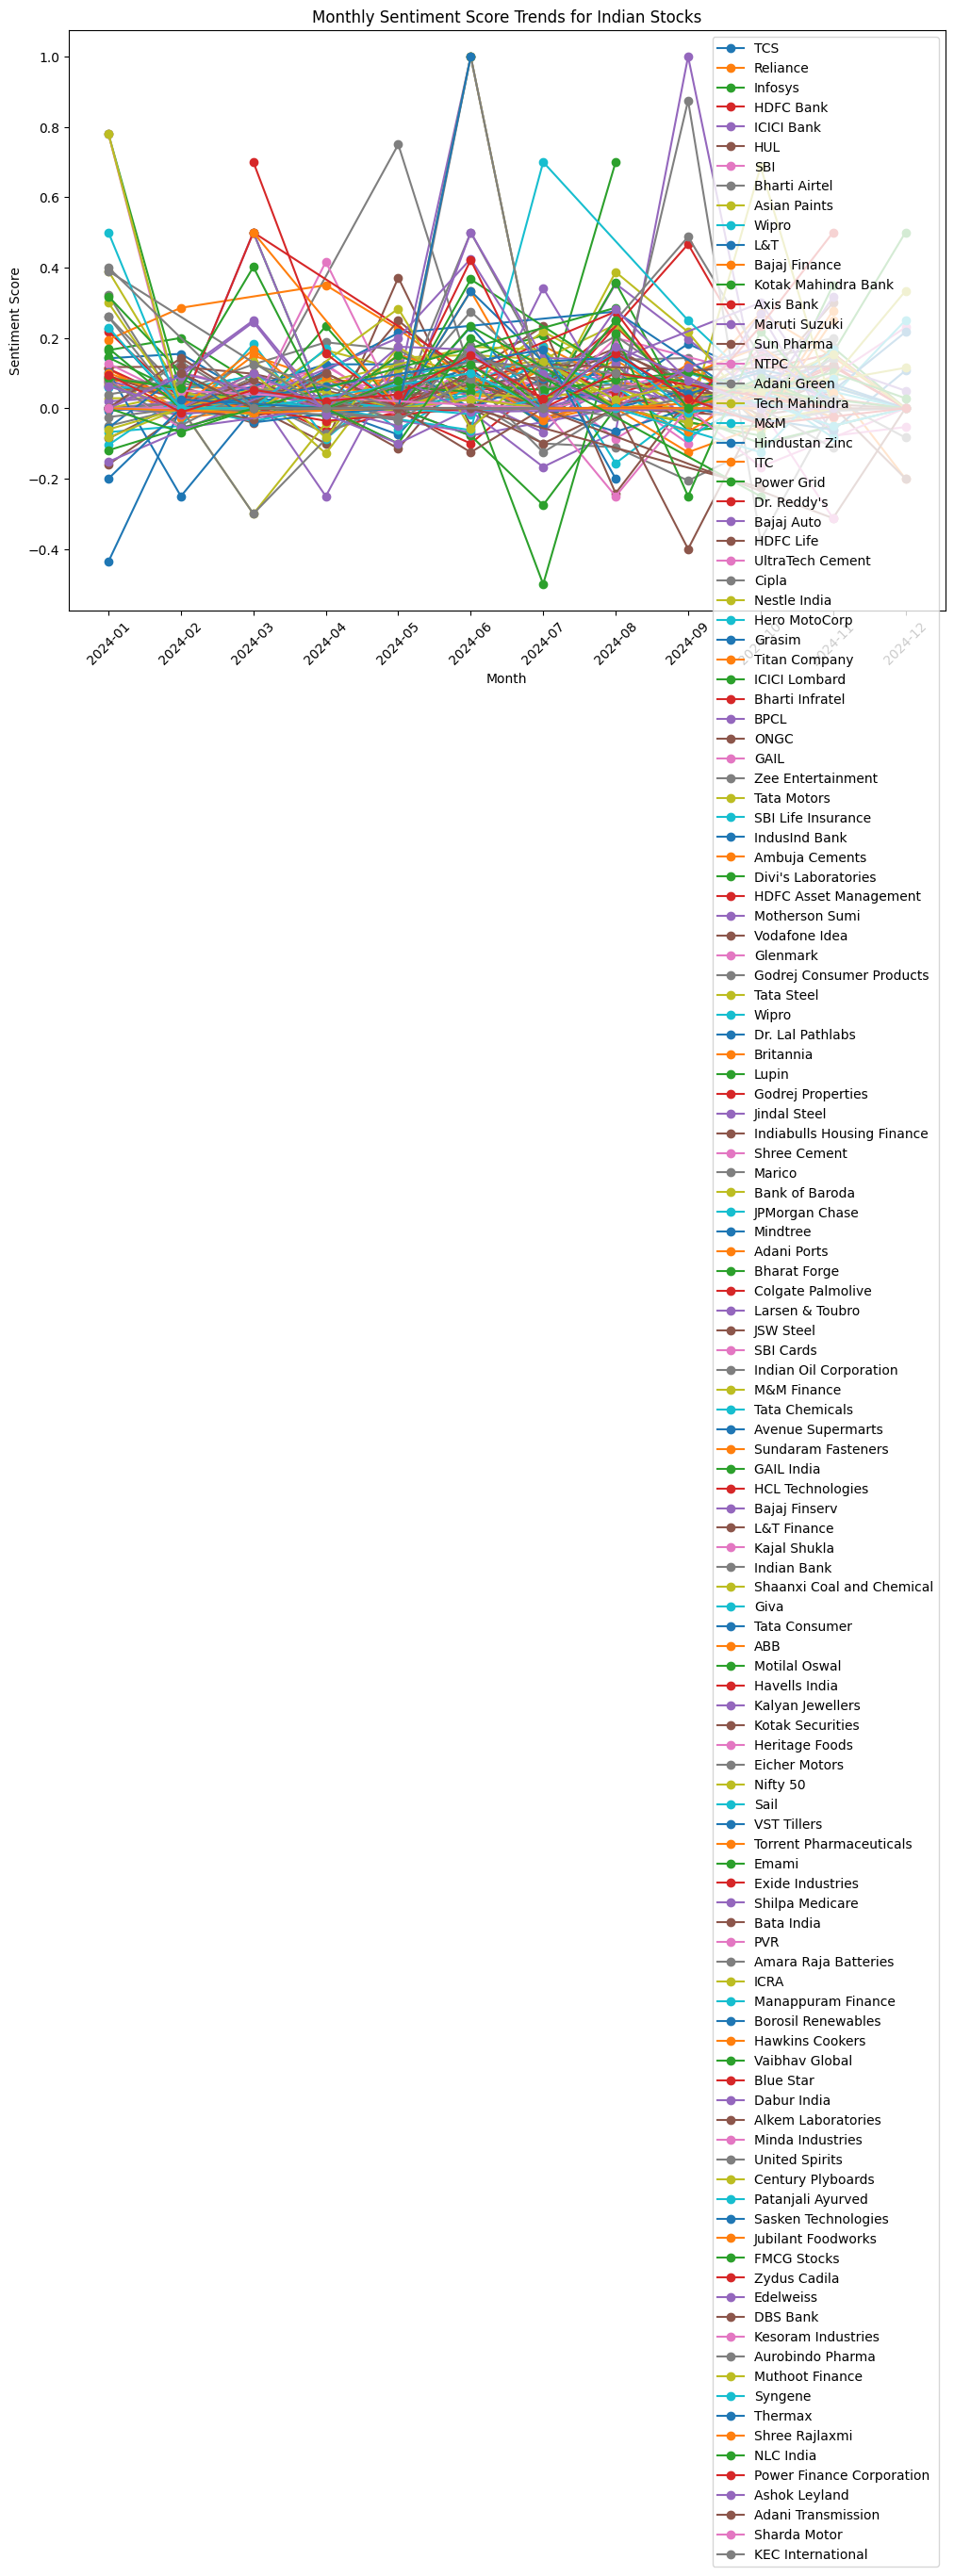

In [4]:
plt.figure(figsize=(12, 8))
for stock in indian_stocks:
    stock_data = monthly_sentiment[monthly_sentiment['Stock'] == stock]
    plt.plot(stock_data['YearMonth'].astype(str), stock_data['Monthly_Sentiment_Score'], marker='o', label=stock)

plt.xticks(rotation=45)
plt.title("Monthly Sentiment Score Trends for Indian Stocks")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()
df.to_csv("reddit_posts_2024.csv", index=False)

Historical Data

In [5]:
import yfinance as yf # Used to fetch historical stock data from Yahoo Finance
from datetime import datetime
import pandas as pd

# Defining a list of stock symbols to fetch data for
stock_symbols =[ "TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "SBIN.NS",
    "BHARTIARTL.NS", "ASIANPAINT.NS", "WIPRO.NS", "LT.NS", "BAJAJFINANCE.NS", "KOTAKBANK.NS", "AXISBANK.NS",
    "MARUTI.NS", "SUNPHARMA.NS", "NTPC.NS", "ADANIGREEN.NS", "TECHM.NS", "MM.NS", "HINDZINC.NS", "ITC.NS",
    "POWERGRID.NS", "DRREDDY.NS", "BAJAJAUTO.NS", "HDFCLIFE.NS", "ULTRACEMCO.NS", "CIPLA.NS", "NESTLEIND.NS",
    "HEROMOTOCO.NS", "GRASIM.NS", "TITAN.NS", "ICICILOMBARD.NS", "BHARTIINFRATEL.NS", "BPCL.NS", "ONGC.NS",
    "GAIL.NS", "ZEEL.NS", "TATAMOTORS.NS", "SBILIFE.NS", "INDUSINDBK.NS", "AMBUJACEM.NS", "DIVISLAB.NS",
    "HDFCAMC.NS", "MOTHERSON.NS", "VODAFONEIDEA.NS", "GLENMARK.NS", "GODREJCP.NS", "TATASTEEL.NS", "DRL.NS",
    "WIPRO.NS", "LALPATHLABS.NS", "BRITANNIA.NS", "LUPIN.NS", "GODREJPROP.NS", "JINDALSTEL.NS",
    "INDIABULLSHSG.NS", "SHREECEM.NS", "MARICO.NS", "BANKBARODA.NS", "MINDTREE.NS", "ADANIPORTS.NS",
    "BHARATFORGE.NS", "COLPAL.NS", "LARSEN.NS", "JSWSTEEL.NS", "SBICARD.NS", "IOC.NS", "MUTHOOTFIN.NS",
    "TATACHEM.NS", "AVENUESUPERMARTS.NS", "SUNDARMFIN.NS", "GAILINDIA.NS", "HCLTECH.NS", "BAJAJFINSV.NS",
    "LTFS.NS", "KALYANJEWELLERS.NS", "KOTAKSEC.NS", "HERITAGEFOODS.NS", "EICHERMOT.NS", "NIFTY50.NS",
    "SAIL.NS", "TORNTPHARM.NS", "EMAMI.NS", "EXIDEIND.NS", "SHILPAMEDICARE.NS", "BATAINDIA.NS", "PVR.NS",
    "AMARAJABAT.NS", "ICRA.NS", "MANAPPURAM.NS", "BOROSILRENEW.NS", "HAWKINS.NS", "VAIBHAVGLOBAL.NS",
    "BLUESTARCO.NS", "DABUR.NS", "ALKEM.NS", "MINDINDIA.NS", "UNIVERSAL.NS", "TATAPOWER.NS", "VSTTILLERS.NS",
    "TORNTPHARM.NS", "JUBILANTFOOD.NS", "FMCG.NS", "ZYDUSCADILA.NS", "EDELWEISS.NS", "DBSINDIA.NS",
    "KESORAMIND.NS", "AUROBINDO.NS", "MUTHOOTF.NS", "SYNGENTA.NS", "THERMAX.NS", "RAJALAXMI.NS", "NLCINDIA.NS",
    "POWERFINCORP.NS", "ASHOKLEYLAND.NS", "ADANITRANS.NS", "SHARDAMOTOR.NS", "KECINTL.NS"
]

# Setting the date range for fetching the stock data (from Jan 1, 2024, to the current date)
start_date = "2024-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")  # Getting the current date for the end date

# Initialize an empty list to store the monthly stock data summary
monthly_stock_summary = []

# Loop through each stock symbol to fetch its data
for stock in stock_symbols:
    print(f"Fetching data for {stock}...")  # Informing that we are fetching data for a particular stock
    data = yf.download(stock, start=start_date, end=end_date)  # Fetching stock data from Yahoo Finance

    if not data.empty:  # Ensure that data is not empty
        data['YearMonth'] = data.index.to_period('M')  # Adding a new column to represent Year-Month period for grouping

        # Get the unique months in the data for monthly analysis
        unique_months = data['YearMonth'].unique()

        # Loop through each unique month
        for month in unique_months:
            monthly_data = data[data['YearMonth'] == month]  # Filter data for the current month

            if not monthly_data.empty:  # Ensure there's data for the current month
                starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
                ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month

                print(starting_price)  # Debugging: print starting price to track

                # Calculate the price change during the month
                change = ending_price - starting_price
                direction = 'positive' if change > 0 else 'negative'  # Determine if the stock movement is positive or negative

                # Append the monthly data summary to the list
                monthly_stock_summary.append({
                    "Stock": stock,
                    "Month": str(month),  # Convert the period to a string for easier handling
                    "Starting Price": starting_price,
                    "Ending Price": ending_price,
                    "Change": change,
                    "Direction": direction
                })

# Create a DataFrame from the list of monthly stock data summaries
summary_df = pd.DataFrame(monthly_stock_summary)

# Save the resulting DataFrame to a CSV file for future analysis
summary_df.to_csv("monthly_stock_summary_2024.csv", index=False)

print(summary_df)  # Output the full summary DataFrame for verification


Fetching data for TCS.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3811.10009765625
3854.14990234375
4094.35009765625
3916.75
3863.300048828125
3702.85009765625
3978.199951171875
4397.10009765625
4521.0498046875
4287.89990234375
3984.199951171875
4276.64990234375
Fetching data for RELIANCE.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1295.125
1426.6500244140625
1492.125
1484.7750244140625
1466.550048828125
1510.324951171875
1560.1500244140625
1515.300048828125
1516.25
1464.824951171875
1338.6500244140625
1309.1500244140625
Fetching data for INFY.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1551.3499755859375
1657.050048828125
1654.699951171875
1495.449951171875
1414.449951171875
1405.9000244140625
1590.800048828125
1852.5999755859375
1964.5
1904.3499755859375
1760.8499755859375
1879.800048828125
Fetching data for HDFCBANK.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1698.0999755859375
1466.3499755859375
1430.75
1470.5
1532.25
1572.199951171875
1705.199951171875
1638.800048828125
1626.949951171875
1726.199951171875
1737.300048828125
1804.699951171875
Fetching data for ICICIBANK.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed

999.4000244140625
1025.1500244140625
1086.9000244140625
1099.6500244140625
1139.449951171875
1160.0
1211.8499755859375
1210.0999755859375
1229.949951171875
1274.4000244140625
1291.800048828125
1304.6500244140625
Fetching data for HINDUNILVR.NS...



<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


2654.75
2473.60009765625
2409.699951171875
2285.89990234375
2226.300048828125
2355.89990234375
2505.10009765625
2715.550048828125
2789.050048828125
2923.75
2537.5
2479.14990234375
Fetching data for SBIN.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


641.3499755859375
647.6500244140625
769.1500244140625
758.2999877929688
830.0499877929688
905.6500244140625
841.9500122070312
862.6500244140625
822.1500244140625
796.9500122070312
821.2000122070312
836.4000244140625
Fetching data for BHARTIARTL.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1013.0499877929688
1151.199951171875
1128.699951171875
1217.3499755859375
1304.050048828125
1391.0999755859375
1454.0
1505.5
1571.3499755859375
1698.699951171875
1616.449951171875
1643.5999755859375
Fetching data for ASIANPAINT.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3396.10009765625
2929.35009765625
2831.75
2871.0
2975.39990234375
2866.449951171875
2927.800048828125
3099.35009765625
3150.949951171875
3277.35009765625
2939.85009765625
2479.050048828125
Fetching data for WIPRO.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


238.5749969482422
235.6750030517578
259.54998779296875
242.47500610351562
228.6999969482422
222.0500030517578
263.67498779296875
260.7749938964844
266.2250061035156
273.375
275.67498779296875
292.2749938964844
Fetching data for LT.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3525.449951171875
3398.0
3633.5
3838.0
3599.5
3897.14990234375
3526.550048828125
3779.300048828125
3683.10009765625
3653.5
3626.35009765625
3704.050048828125
Fetching data for BAJAJFINANCE.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAJAJFINANCE.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Fetching data for KOTAKBANK.NS...



<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1909.1500244140625
1822.75
1727.699951171875
1790.699951171875
1575.6500244140625
1718.050048828125
1808.0999755859375
1792.6500244140625
1780.25
1879.4000244140625
1744.4000244140625
1753.949951171875
Fetching data for AXISBANK.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1097.699951171875
1084.25
1099.25
1053.0999755859375
1149.8499755859375
1223.9000244140625
1261.9000244140625
1172.300048828125
1188.800048828125
1226.6500244140625
1169.550048828125
1137.0999755859375
Fetching data for MARUTI.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


10283.2998046875
10637.9501953125
11620.9501953125
12569.599609375
12805.349609375
12476.150390625
12108.650390625
13359.0498046875
12427.400390625
13166.0
11110.0
11239.2998046875
Fetching data for SUNPHARMA.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1260.25
1407.949951171875
1559.25
1629.25
1519.0
1453.050048828125
1520.0999755859375
1715.199951171875
1815.949951171875
1919.949951171875
1858.4000244140625
1808.550048828125
Fetching data for NTPC.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed


309.75
322.0
343.5
342.3500061035156
369.04998779296875
391.79998779296875
369.75
423.45001220703125
410.0
440.1000061035156
411.3500061035156
358.20001220703125
Fetching data for ADANIGREEN.NS...
1598.4000244140625


<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1665.949951171875
1969.550048828125
1888.300048828125
1786.8499755859375
2038.0
1776.8499755859375
1901.949951171875
1945.699951171875
1884.949951171875
1632.6500244140625
1327.949951171875
Fetching data for TECHM.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1297.1500244140625
1312.5
1271.800048828125
1244.550048828125
1266.9000244140625
1245.3499755859375
1472.0999755859375
1544.449951171875
1646.6500244140625
1625.4000244140625
1603.6500244140625
1745.949951171875
Fetching data for MM.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MM.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for HINDZINC.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


318.3500061035156
317.25
308.75
306.1499938964844
432.1000061035156
696.4000244140625
656.75
647.5999755859375
493.8500061035156
519.9000244140625
558.25
502.8500061035156
Fetching data for ITC.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


468.04998779296875
442.8999938964844
409.5
426.70001220703125
439.0
430.3500061035156
429.04998779296875
493.70001220703125
510.04998779296875
516.2000122070312
490.29998779296875
477.20001220703125
Fetching data for POWERGRID.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


238.25
265.79998779296875
287.70001220703125
280.1499938964844
313.6000061035156
337.6499938964844
329.6000061035156
361.1000061035156
335.54998779296875
350.79998779296875
322.04998779296875
327.8500061035156
Fetching data for DRREDDY.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1164.3299560546875
1198.6300048828125
1238.7099609375
1250.0699462890625
1257.5
1156.6600341796875
1270.739990234375
1377.5899658203125
1374.4300537109375
1349.8199462890625
1259.5999755859375
1221.75
Fetching data for BAJAJAUTO.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAJAJAUTO.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for HDFCLIFE.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


648.7000122070312
587.0999755859375
589.9500122070312
634.75
576.3499755859375
550.0999755859375
600.75
713.5999755859375
745.2999877929688
710.2000122070312
723.7000122070312

[*********************100%***********************]  1 of 1 completed


640.2000122070312
Fetching data for ULTRACEMCO.NS...
10464.0
9922.2998046875


<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed


10135.5
9954.400390625
9983.4501953125
10470.0498046875
11904.650390625
11984.5
11424.900390625
11837.150390625
11145.7998046875
11648.5498046875
Fetching data for CIPLA.NS...



<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1251.0
1387.6500244140625
1470.9000244140625
1498.6500244140625
1420.050048828125
1452.3499755859375
1479.0999755859375
1546.199951171875
1646.6500244140625
1664.8499755859375
1559.550048828125
1507.699951171875
Fetching data for NESTLEIND.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


2737.239990234375
2467.800048828125
2601.449951171875
2585.60009765625
2512.300048828125
2355.050048828125
2568.10009765625
2484.0
2509.89990234375
2707.050048828125
2282.300048828125
2251.85009765625
Fetching data for HEROMOTOCO.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


4118.5498046875
4586.7001953125
4507.10009765625
4680.75
4561.5
5160.60009765625
5603.10009765625
5371.85009765625
5578.2001953125
5750.10009765625
5020.5
4748.4501953125
Fetching data for GRASIM.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


2118.875
2128.60009765625
2254.89990234375
2292.550048828125
2437.35009765625
2368.800048828125
2726.39990234375
2767.0
2690.800048828125
2801.14990234375
2698.89990234375
2693.550048828125
Fetching data for TITAN.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3677.14990234375
3627.449951171875
3765.89990234375
3738.39990234375
3568.449951171875
3261.199951171875
3431.449951171875
3468.35009765625
3587.550048828125
3775.949951171875
3293.699951171875
3306.85009765625
Fetching data for ICICILOMBARD.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ICICILOMBARD.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for BHARTIINFRATEL.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BHARTIINFRATEL.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for BPCL.NS...
226.02499389648438


[*********************100%***********************]  1 of 1 completed


254.22500610351562
311.6499938964844
300.3500061035156
317.32501220703125
333.07501220703125
304.54998779296875
349.1000061035156
358.45001220703125
368.25
313.0
294.1499938964844
Fetching data for ONGC.NS...
205.35000610351562
247.64999389648438


<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single ele

270.54998779296875
269.8999938964844
282.79998779296875
284.1000061035156
272.95001220703125
341.75
326.20001220703125
291.95001220703125
271.75
257.54998779296875
Fetching data for GAIL.NS...
166.1999969482422
173.6999969482422
184.14999389648438
182.35000610351562
205.0500030517578
230.8000030517578
222.5500030517578
239.0
234.05999755859375
239.75999450683594


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


200.16000366210938
198.5399932861328
Fetching data for ZEEL.NS...
285.04998779296875
170.5500030517578
155.3000030517578
147.10000610351562
143.85000610351562
156.3000030517578
152.92999267578125
141.77000427246094
142.0
140.11000061035156
123.19000244140625
130.50999450683594
Fetching data for TATAMOTORS.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

790.5999755859375
878.5
977.4000244140625
992.25
1027.800048828125
950.4500122070312
1002.0499877929688
1144.4000244140625
1092.6500244140625
965.2000122070312
843.4500122070312
790.0499877929688
Fetching data for SBILIFE.NS...
1432.0999755859375
1432.75
1542.1500244140625
1489.949951171875
1460.9000244140625
1391.5
1501.8499755859375
1767.25
1888.75
1834.199951171875
1628.8499755859375
1422.050048828125
Fetching data for INDUSINDBK.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

1598.8499755859375
1541.1500244140625
1526.6500244140625
1542.4000244140625
1505.199951171875
1529.699951171875
1456.9000244140625
1419.8499755859375
1449.050048828125
1409.699951171875
1062.5
990.9500122070312
Fetching data for AMBUJACEM.NS...
534.2999877929688
565.0499877929688
617.5999755859375
621.5
625.7000122070312
670.7999877929688
695.0
664.0
620.4000244140625
632.4500122070312
582.4500122070312
538.7999877929688
Fetching data for DIVISLAB.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3915.89990234375
3655.39990234375
3482.39990234375
3567.949951171875
3964.64990234375
4321.89990234375
4602.10009765625
4917.89990234375
5036.85009765625
5423.7998046875
5903.5498046875
6255.35009765625
Fetching data for HDFCAMC.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

3221.300048828125
3587.949951171875
3784.75
3785.10009765625
3938.39990234375
4090.199951171875
4109.7001953125
4182.85009765625
4403.2998046875
4365.0
4322.85009765625
4250.0498046875
Fetching data for MOTHERSON.NS...
105.8499984741211
115.19999694824219
119.4000015258789
120.1500015258789
130.1999969482422
149.4499969482422
196.75
196.3000030517578
193.22000122070312
210.75
182.22999572753906
165.75
Fetching data for VODAFONEIDEA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VODAFONEIDEA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for GLENMARK.NS...
855.6500244140625
890.5
920.2999877929688
982.4500122070312
1060.5
1176.199951171875
1267.449951171875
1437.699951171875
1687.9000244140625
1666.949951171875
1690.300048828125
1547.550048828125
Fetching data for GODREJCP.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

1144.800048828125
1254.550048828125
1267.449951171875
1228.3499755859375
1233.300048828125
1306.5
1398.050048828125
1470.25
1470.050048828125
1388.25
1275.0999755859375
1227.1500244140625
Fetching data for TATASTEEL.NS...
139.85000610351562
134.8000030517578
149.9499969482422
163.14999389648438
167.35000610351562
174.25
174.07000732421875
163.05999755859375
152.8800048828125
167.02999877929688


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


149.75
146.41000366210938
Fetching data for DRL.NS...
14.300000190734863
18.299999237060547
23.899999618530273
26.350000381469727
26.350000381469727
26.649999618530273
26.649999618530273
21.600000381469727
18.0
13.0
14.25
12.899999618530273
Fetching data for WIPRO.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


238.5749969482422
235.6750030517578
259.54998779296875
242.47500610351562
228.6999969482422
222.0500030517578
263.67498779296875
260.7749938964844
266.2250061035156
273.375
275.67498779296875
292.2749938964844
Fetching data for LALPATHLABS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LALPATHLABS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for BRITANNIA.NS...
5319.7998046875
5148.60009765625
4927.7001953125
4895.2001953125
4759.64990234375
5167.7998046875
5476.5
5730.14990234375
5922.14990234375
6446.0498046875
5693.0498046875
4907.25
Fetching data for LUPIN.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

1312.8499755859375
1513.699951171875
1624.550048828125
1623.75
1647.6500244140625
1583.949951171875
1616.050048828125
1953.3499755859375
2232.75
2194.39990234375
2197.699951171875
2069.550048828125
Fetching data for GODREJPROP.NS...
2002.050048828125
2355.10009765625
2428.050048828125
2389.699951171875
2532.699951171875
2964.75
3161.64990234375
3127.199951171875
2886.10009765625
3252.449951171875
2882.699951171875
2901.39990234375
Fetching data for JINDALSTEL.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


744.0
742.4500122070312
822.8499755859375
868.3499755859375
941.8499755859375
1057.449951171875
1059.5
983.2999877929688
965.3499755859375
1035.3499755859375
929.5
918.5499877929688
Fetching data for INDIABULLSHSG.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INDIABULLSHSG.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for SHREECEM.NS...
28461.599609375
29613.55078125
25637.80078125
26458.0
24827.19921875
25309.25
28353.349609375
27768.5
25427.30078125
26523.25
25241.05078125
26784.0
Fetching data for MARICO.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed


542.25
536.0
524.25
495.79998779296875
517.8499755859375
594.0999755859375
620.5
674.9000244140625
650.9500122070312
693.6500244140625
645.9500122070312
646.5499877929688
Fetching data for BANKBARODA.NS...


<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


233.75
255.9499969482422
271.1499938964844
266.75
279.3999938964844
296.95001220703125
272.1499938964844
251.25
253.89999389648438
248.91000366210938
253.6999969482422
246.41000366210938
Fetching data for MINDTREE.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTREE.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for ADANIPORTS.NS...
1047.8499755859375
1218.8499755859375
1322.0999755859375
1375.9000244140625
1338.800048828125
1583.949951171875
1474.5
1590.1500244140625
1494.5
1467.5
1394.4000244140625
1215.800048828125
Fetching data for BHARATFORGE.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BHARATFORGE.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for COLPAL.NS...
2486.10009765625
2503.39990234375
2534.64990234375
2716.199951171875
2811.800048828125
2687.14990234375
2861.449951171875
3374.199951171875
3629.550048828125
3820.14990234375
3066.0
2887.449951171875
Fetching data for LARSEN.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LARSEN.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for JSWSTEEL.NS...
877.5999755859375
801.7000122070312
836.2000122070312
871.9500122070312
890.3499755859375
915.2999877929688
943.9000244140625
934.5499877929688
940.4500122070312
1027.300048828125
968.2999877929688
989.7999877929688
Fetching data for SBICARD.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


766.3499755859375
711.9500122070312
717.9000244140625
688.0499877929688
729.4000244140625
705.2000122070312
723.0
720.4500122070312
744.3499755859375
770.2000122070312
694.7999877929688
703.0499877929688
Fetching data for IOC.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

130.3000030517578
149.75
169.39999389648438
169.25
173.39999389648438
175.3000030517578
167.66000366210938
179.72999572753906
178.72999572753906
179.05999755859375
144.99000549316406
137.64999389648438
Fetching data for MUTHOOTFIN.NS...
1466.0
1360.8499755859375
1321.3499755859375
1563.699951171875


[*********************100%***********************]  1 of 1 completed

1716.8499755859375
1705.699951171875
1788.5999755859375
1864.3499755859375
1965.0
1955.9000244140625
1931.449951171875
1935.550048828125
Fetching data for TATACHEM.NS...



<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1117.8499755859375
1014.9000244140625
968.0
1087.199951171875
1100.6500244140625
1060.8499755859375
1107.3499755859375
1103.75
1084.1500244140625
1132.5999755859375
1154.75
1129.800048828125
Fetching data for AVENUESUPERMARTS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVENUESUPERMARTS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for SUNDARMFIN.NS...
3496.35009765625
3523.5
4178.35009765625
4136.60009765625
4853.25
4437.64990234375
4625.75
4328.2001953125
4968.2001953125
5250.85009765625
4870.64990234375
4023.550048828125
Fetching data for GAILINDIA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GAILINDIA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for HCLTECH.NS...
1483.75
1577.4000244140625
1644.0999755859375
1556.699951171875
1360.699951171875
1314.449951171875
1468.8499755859375
1640.550048828125
1806.6500244140625
1816.5
1757.4000244140625


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


1871.5
Fetching data for BAJAJFINSV.NS...
1676.4000244140625
1622.25
1613.4000244140625
1646.0
1615.449951171875
1575.800048828125
1580.199951171875
1634.800048828125
1840.550048828125
1975.25
1754.699951171875
1596.6500244140625
Fetching data for LTFS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTFS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for KALYANJEWELLERS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KALYANJEWELLERS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for KOTAKSEC.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KOTAKSEC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for HERITAGEFOODS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HERITAGEFOODS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Fetching data for EICHERMOT.NS...
4038.35009765625
3933.199951171875
3843.550048828125

<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NIFTY50.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-07)')



3946.64990234375
4602.39990234375
4670.85009765625
4635.5498046875
4968.7998046875
4911.9501953125
4972.64990234375
4953.60009765625
4820.7001953125
Fetching data for NIFTY50.NS...
Fetching data for SAIL.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

124.69999694824219
119.30000305175781
133.0
140.75
165.4499969482422
166.35000610351562
149.05999755859375
150.02999877929688
133.1699981689453
141.02999877929688
117.75
119.08000183105469
Fetching data for TORNTPHARM.NS...
2296.300048828125
2512.5
2668.64990234375
2675.35009765625
2670.0
2677.949951171875
2781.199951171875
3205.0
3429.75
3369.89990234375
3205.300048828125
3339.14990234375
Fetching data for EMAMI.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EMAMI.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for EXIDEIND.NS...
322.0
334.20001220703125
324.1000061035156
310.54998779296875
464.0
504.8999938964844
569.4000244140625
512.75
490.5
511.54998779296875
458.95001220703125
451.25
Fetching data for SHILPAMEDICARE.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHILPAMEDICARE.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for BATAINDIA.NS...
1641.6500244140625
1459.1500244140625
1432.5
1369.199951171875
1354.25
1368.449951171875
1496.1500244140625
1620.199951171875
1460.800048828125
1427.3499755859375
1356.75
1433.449951171875
Fetching data for PVR.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PVR.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for AMARAJABAT.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMARAJABAT.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for ICRA.NS...
5598.85009765625
5477.75
5734.5498046875
5431.85009765625
5265.64990234375
5577.2001953125
5829.25
5637.0498046875
5976.14990234375
7269.2001953125
7231.2998046875
6716.0
Fetching data for MANAPPURAM.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


171.35000610351562
181.5
179.9499969482422
181.89999389648438
200.89999389648438
173.4499969482422
211.74000549316406
213.67999267578125
212.52000427246094
197.47000122070312
159.63999938964844
156.17999267578125
Fetching data for BOROSILRENEW.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BOROSILRENEW.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for HAWKINS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HAWKINS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for VAIBHAVGLOBAL.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VAIBHAVGLOBAL.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Fetching data for BLUESTARCO.NS...


<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


948.7999877929688
1184.8499755859375
1308.050048828125
1276.9000244140625
1470.5999755859375
1599.8499755859375
1622.9000244140625
1756.25
1660.5999755859375
2095.85009765625
1917.0999755859375
1842.3499755859375
Fetching data for DABUR.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

557.4500122070312
554.4000244140625
541.0999755859375
529.1500244140625
525.2999877929688
544.7999877929688
610.9500122070312
643.5
636.6500244140625
619.0
542.5499877929688
523.9000244140625
Fetching data for ALKEM.NS...
5120.0
4854.75
5112.89990234375
5009.0498046875
4787.7998046875
4822.10009765625
4958.60009765625
5271.2998046875
6073.64990234375
6151.25
5805.25
5692.75
Fetching data for MINDINDIA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDINDIA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for UNIVERSAL.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UNIVERSAL.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for TATAPOWER.NS...
330.29998779296875
388.8500061035156
377.3999938964844
406.95001220703125
457.8500061035156
456.54998779296875
435.3999938964844
464.3999938964844
433.20001220703125
481.25
445.45001220703125
416.5
Fetching data for VSTTILLERS.NS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-i

3700.800048828125
3178.800048828125
3255.550048828125
3343.949951171875
3498.60009765625
3445.85009765625
4152.25
4206.2998046875
4275.85009765625
4677.7998046875
4620.60009765625
4992.64990234375
Fetching data for TORNTPHARM.NS...
2296.300048828125
2512.5
2668.64990234375
2675.35009765625
2670.0
2677.949951171875
2781.199951171875
3205.0
3429.75
3369.89990234375
3205.300048828125
3339.14990234375
Fetching data for JUBILANTFOOD.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JUBILANTFOOD.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for FMCG.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FMCG.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for ZYDUSCADILA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZYDUSCADILA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for EDELWEISS.NS...
78.44999694824219
68.1500015258789
75.9000015258789
66.0
78.25
73.69999694824219
65.97000122070312
68.56999969482422
110.05999755859375
140.8300018310547
113.4000015258789
125.12999725341797
Fetching data for DBSINDIA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DBSINDIA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for KESORAMIND.NS...
176.75
168.10000610351562
172.75
173.1999969482422
183.3000030517578
189.1999969482422
214.17999267578125
218.44000244140625
210.6300048828125
224.30999755859375
211.42999267578125
225.57000732421875
Fetching data for AUROBINDO.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUROBINDO.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for MUTHOOTF.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUTHOOTF.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for SYNGENTA.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNGENTA.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Fetching data for THERMAX.NS...



<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


3091.39990234375
3136.199951171875
3630.14990234375
4288.14990234375
4696.2998046875
5658.60009765625
5298.14990234375
5180.2001953125
4384.7001953125
5098.7998046875
4996.9501953125
4682.5498046875
Fetching data for RAJALAXMI.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAJALAXMI.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-9479af1aa364>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  starting_price = float(monthly_data.iloc[0]['Close'])  # Get the closing price at the start of the month
<ipython-input-5-9479af1aa364>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ending_price = float(monthly_data.iloc[-1]['Close'])  # Get the closing price at the end of the month


Fetching data for NLCINDIA.NS...
250.1999969482422
260.6000061035156
220.85000610351562
231.4499969482422
242.10000610351562
241.3000030517578
244.13999938964844
284.20001220703125
275.45001220703125
289.1000061035156
258.54998779296875
263.1000061035156
Fetching data for POWERFINCORP.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['POWERFINCORP.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for ASHOKLEYLAND.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASHOKLEYLAND.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for ADANITRANS.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADANITRANS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for SHARDAMOTOR.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHARDAMOTOR.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for KECINTL.NS...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KECINTL.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


           Stock    Month  Starting Price  Ending Price      Change Direction
0         TCS.NS  2024-01     3811.100098   3815.949951    4.849854  positive
1         TCS.NS  2024-02     3854.149902   4095.100098  240.950195  positive
2         TCS.NS  2024-03     4094.350098   3876.300049 -218.050049  negative
3         TCS.NS  2024-04     3916.750000   3820.649902  -96.100098  negative
4         TCS.NS  2024-05     3863.300049   3670.949951 -192.350098  negative
..           ...      ...             ...           ...         ...       ...
943  NLCINDIA.NS  2024-08      284.200012    275.100006   -9.100006  negative
944  NLCINDIA.NS  2024-09      275.450012    282.500000    7.049988  positive
945  NLCINDIA.NS  2024-10      289.100006    257.500000  -31.600006  negative
946  NLCINDIA.NS  2024-11      258.549988    258.850006    0.300018  positive
947  NLCINDIA.NS  2024-12      263.100006    266.299988    3.199982  positive

[948 rows x 6 columns]


Prediction Model using RandomForestRegressor(model.py)

<ipython-input-6-15fac30b94a7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Monthly_Sentiment_Score'].fillna(0, inplace=True)



Actual vs Predicted Closing Prices for All Stocks:
           Stock    Month  Actual_Closing_Price  Predicted_Closing_Price
0         TCS.NS  2024-01           3815.949951              3726.222988
1         TCS.NS  2024-02           4095.100098              3936.887056
2         TCS.NS  2024-03           3876.300049              4043.865059
3         TCS.NS  2024-04           3820.649902              3787.330935
4         TCS.NS  2024-05           3670.949951              3725.510979
..           ...      ...                   ...                      ...
943  NLCINDIA.NS  2024-08            275.100006               266.511751
944  NLCINDIA.NS  2024-09            282.500000               282.342997
945  NLCINDIA.NS  2024-10            257.500000               262.366999
946  NLCINDIA.NS  2024-11            258.850006               247.766300
947  NLCINDIA.NS  2024-12            266.299988               268.653496

[948 rows x 4 columns]

Model Evaluation:
Mean Absolute Error (MAE): 13

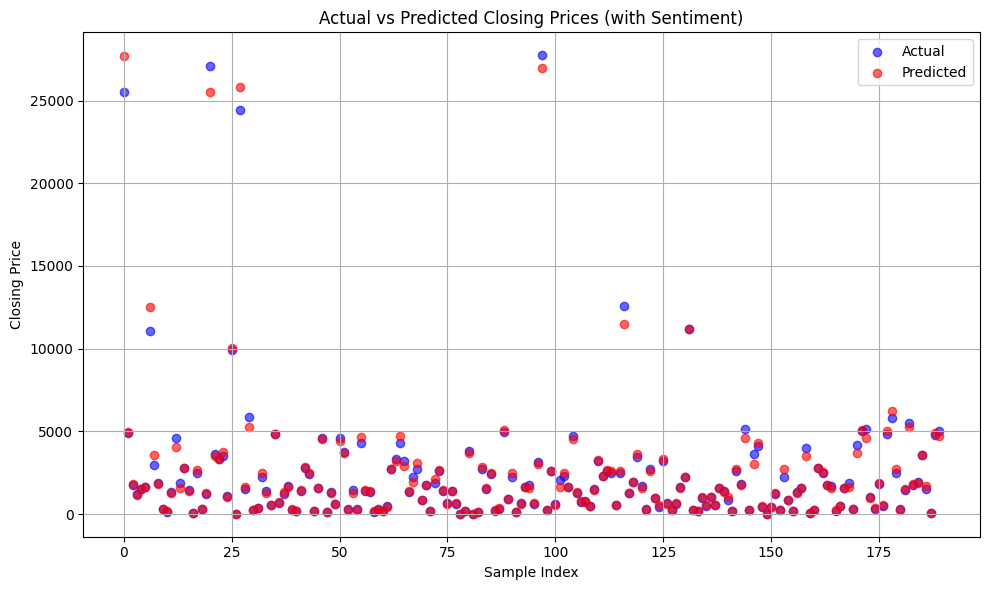

Accuracy:  0.9940260805602048


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Month' in summary_df to string (if it's a datetime or string)
summary_df['Month'] = pd.to_datetime(summary_df['Month']).dt.to_period('M').astype(str)

# Convert 'YearMonth' in monthly_sentiment to string
monthly_sentiment['YearMonth'] = monthly_sentiment['YearMonth'].astype(str)

# Now merge the dataframes
merged_df = summary_df.merge(monthly_sentiment, left_on=['Stock', 'Month'], right_on=['Stock', 'YearMonth'], how='left')

# Handle missing sentiment scores by filling with zero (neutral sentiment)
merged_df['Monthly_Sentiment_Score'].fillna(0, inplace=True)

# Prepare the data for training the model
merged_df['Month_Number'] = pd.to_datetime(merged_df['Month']).dt.month  # Add month number for seasonality
features = ['Starting Price', 'Month_Number', 'Monthly_Sentiment_Score']  # Features
target = 'Ending Price'  # Target

# Split the data into train and test sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_all_pred = model.predict(X)

# Combine actual and predicted prices into a new DataFrame
merged_df['Predicted_Closing_Price'] = y_all_pred
merged_df['Actual_Closing_Price'] = merged_df[target]

# Display the actual and predicted closing prices for each stock and month
comparison_df = merged_df[['Stock', 'Month', 'Actual_Closing_Price', 'Predicted_Closing_Price']]

# Display the result in tabular format
print("\nActual vs Predicted Closing Prices for All Stocks:")
print(comparison_df)

# Optionally, save the results to a CSV file for later use
comparison_df.to_csv("predicted_closing_prices_2024.csv", index=False)

# Evaluate the model performance using regression metrics
mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, model.predict(X_test))

# Print the model's performance metrics
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize the comparison between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Closing Prices (with Sentiment)")
plt.xlabel("Sample Index")
plt.ylabel("Closing Price")
plt.grid()
plt.tight_layout()
plt.show()
print("Accuracy: ",model.score(X_test,y_test))

**1. Actual Data Points (Blue):**
The blue markers in the plot represent the actual closing prices of stocks for various time periods (e.g., months) based on historical stock data fetched from Yahoo Finance (y_test).
These values are the ground truth against which the model’s predictions are compared.

**2. Predicted Data Points (Red):**
The red markers in the plot represent the predicted closing prices as generated by the Random Forest Regressor (y_pred).
These predictions are made using features such as the stock's starting price, the sentiment score from Reddit, and the month number.

**3. Alignment Between Actual and Predicted Points:**
The closeness of red markers (predicted values) to blue markers (actual values) shows the model’s accuracy.
If the red markers are consistently close to the blue ones, it indicates that the model is predicting well.